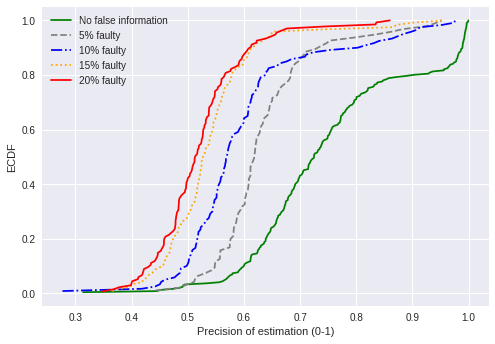

In [6]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity', 'eligible','total']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data.time))
        #client_data = client_data.head(200)
        client_data = client_data.query('similarity < 1.0')
        data = pd.concat([data, client_data])
        
    data = data.resample('2Min').mean()
    return data

data = read_clients("tolerance/0")
data5 = read_clients("tolerance/5")
data10 = read_clients("tolerance/10")
data15 = read_clients("tolerance/15")
data20 = read_clients("tolerance/20")



def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

plt.plot(getECDF(data), color= 'green', linestyle='-')
plt.plot(getECDF(data5), color= 'grey', linestyle='--')
plt.plot(getECDF(data10), color= 'blue', linestyle='-.')
plt.plot(getECDF(data15), color='orange', linestyle=':')
plt.plot(getECDF(data20), color= 'red', linestyle='-')

styles=['bs-', 'ro-', 'y^-']


plt.xlabel('Precision of estimation (0-1)')
legends = ['No false information','5% faulty','10% faulty', '15% faulty', '20% faulty']
plt.legend(legends)
plt.ylabel('ECDF')
plt.show()

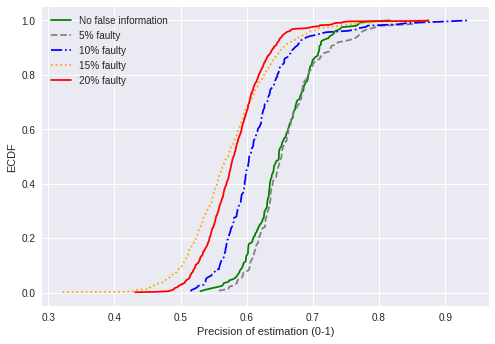

In [8]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity', 'eligible','total']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data.time))
        client_data = client_data.query('similarity < 1.0 & total>10')
        #client_data = client_data.head(200)
        data = pd.concat([data, client_data])
        
    data = data.resample('2Min').mean()
    return data

data = read_clients("solo/0")
data5 = read_clients("solo/5")
data10 = read_clients("solo/10")
data15 = read_clients("solo/15")
data20 = read_clients("solo/20")



def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

plt.plot(getECDF(data), color= 'green', linestyle='-')
plt.plot(getECDF(data5), color= 'grey', linestyle='--')
plt.plot(getECDF(data10), color= 'blue', linestyle='-.')
plt.plot(getECDF(data15), color='orange', linestyle=':')
plt.plot(getECDF(data20), color= 'red', linestyle='-')

styles=['bs-', 'ro-', 'y^-']


plt.xlabel('Precision of estimation (0-1)')
legends = ['No false information','5% faulty','10% faulty', '15% faulty', '20% faulty']
plt.legend(legends)
plt.ylabel('ECDF')
plt.show()

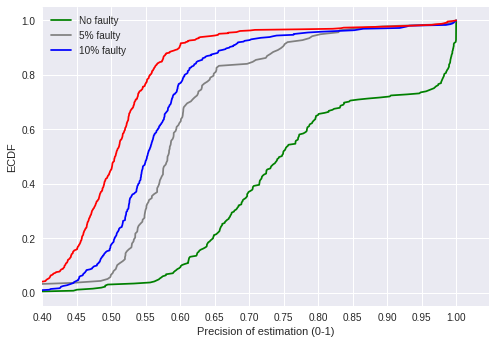

In [25]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity', 'eligible','total']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data.time))
        #client_data = client_data.query('similarity < 1.0')
        #client_data = client_data['eligible'].notnull()
        #client_data = client_data.head(200)
        data = pd.concat([data, client_data])
        
    data = data.resample('2Min').mean()
    
    return data

datal5 = read_clients("tolerance/l5")
datal10 = read_clients("tolerance/l10")
datal15 = read_clients("tolerance/l15")
datal20 = read_clients("tolerance/l20")

data = read_clients("tolerance/0")
data5 = read_clients("tolerance/5")
data10 = read_clients("tolerance/10")
data15 = read_clients("tolerance/15")
data20 = read_clients("tolerance/20")


def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

ax = plt.plot(getECDF(data), color= 'green', linestyle='-')
plt.plot(getECDF(data5), color= 'grey', linestyle='-')
plt.plot(getECDF(data10), color= 'blue', linestyle='-')
plt.plot(getECDF(data15), color= 'red', linestyle='-')

#styles=['bs-', 'ro-', 'y^-']


plt.xlabel('Precision of estimation (0-1)')
legends = ['No faulty','5% faulty','10% faulty']
plt.legend(legends)
plt.ylabel('ECDF')
xmarks=[0.4,0.45, 0.5,0.55, 0.6, 0.65,0.7, 0.75, 0.8, 0.85, 0.9,0.95, 1.0]
plt.xlim(0.5)
plt.xticks(xmarks)
#ax.set_xticks([::5])

plt.show()

In [33]:
from math import*
 
def square_rooted(x): 
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
 
print(cosine_similarity([1.7307818,0.3323312857142857,0.36962366666666663, 0.022409,0.02541133333333333,0.18598233333333333,0.0428708333,0.2205487, 0.096526, 0.651517], 
                        [0.485544,0.039469, 0.199194, 0.035944, 0.041261, 0.202196, 0.061003, 0.252889, 0.037941, 0.362189]))

0.903


In [35]:
print(cosine_similarity([0.28515216666666665,0.316189 ], 
                        [0.02669166666666667, 0.027832]))

0.988


In [ ]:
('10.139.37.194', ':', , ':', , ':', datetime.datetime(2018, 11, 28, 13, 28, 12, 438665))
('10.138.57.2', ':', , ':', , ':', datetime.datetime(2018, 11, 28, 13, 28, 12, 438807))